In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing

In [3]:
data_fake = pd.read_csv('Fake.csv')
print(data_fake.shape)
data_true = pd.read_csv('True.csv')
print(data_true.shape)



(23481, 4)
(21417, 4)


In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
print(data_true.values[0]);
print(data_fake.values[0]);

['As U.S. budget fight looms, Republicans flip their fiscal script'
 'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for

In [7]:
data_true["target"] = 1;
data_fake["target"] = 0;

In [8]:
data = pd.concat([data_fake,data_true])

In [9]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [11]:
data.isnull()

,title,text,subject,date,target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
21412,False,False,False,False,False
21413,False,False,False,False,False
21414,False,False,False,False,False
21415,False,False,False,False,False


In [12]:
data.describe()

,target
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
data.shape

(44898, 5)

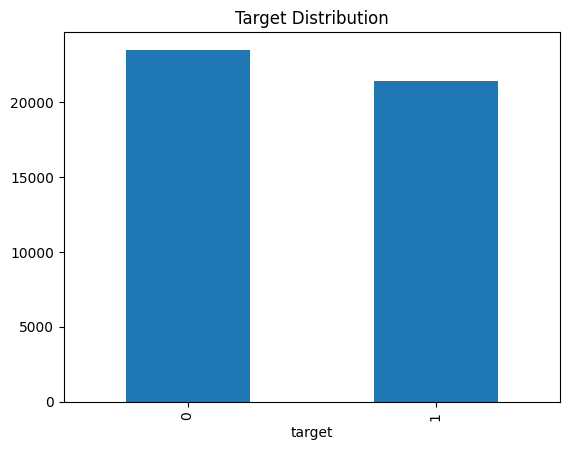

In [14]:
data["target"].value_counts().plot(kind="bar", title="Target Distribution")
plt.show()

/tmp/ipython-input-3681415900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='subject', data=data, order=data['subject'].value_counts().index, palette='viridis')


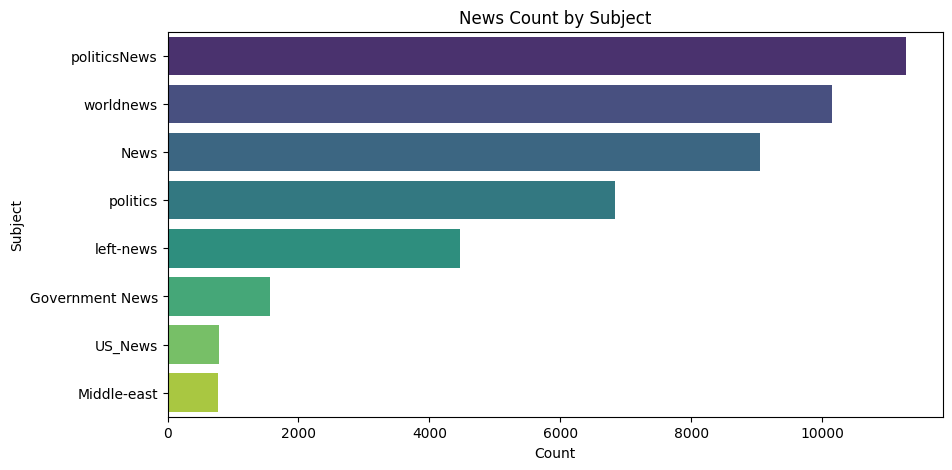

In [15]:
#Bar Chart – News by Subject
plt.figure(figsize=(10,5))
sns.countplot(y='subject', data=data, order=data['subject'].value_counts().index, palette='viridis')
plt.title("News Count by Subject")
plt.xlabel("Count")
plt.ylabel("Subject")
plt.show()

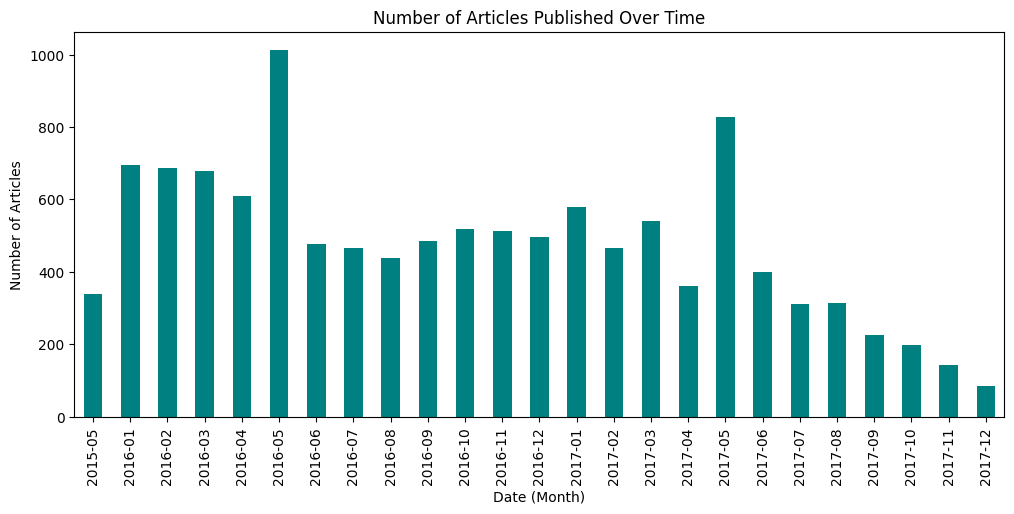

In [16]:
#Histogram – Article Count Over Time
#Convert 'date' to datetime if possible
data['date'] = pd.to_datetime(data['date'], errors='coerce')
plt.figure(figsize=(12,5))
data.groupby(data['date'].dt.to_period("M")).size().plot(kind='bar', color='teal')
plt.title("Number of Articles Published Over Time")
plt.xlabel("Date (Month)")
plt.ylabel("Number of Articles")
plt.show()

/tmp/ipython-input-3434078898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='subject', data=data, palette='Set2')


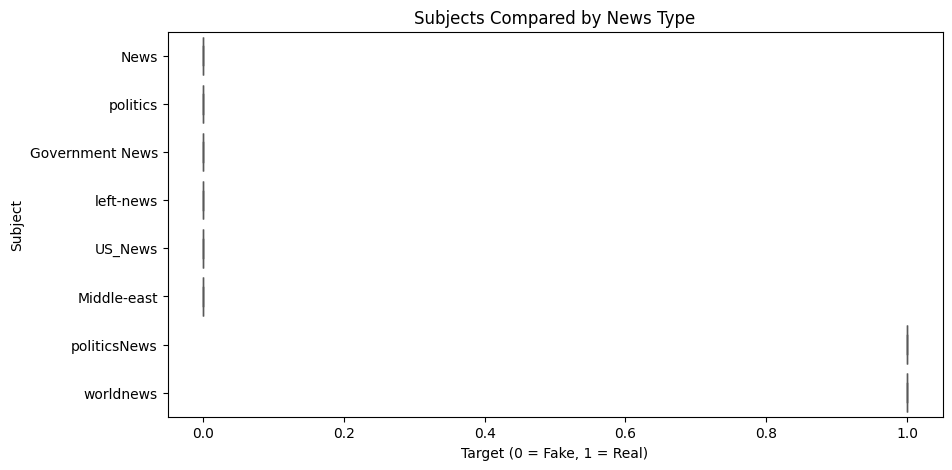

In [17]:
# Boxplot – Subject vs Target
plt.figure(figsize=(10,5))
sns.boxplot(x='target', y='subject', data=data, palette='Set2')
plt.title("Subjects Compared by News Type")
plt.xlabel("Target (0 = Fake, 1 = Real)")
plt.ylabel("Subject")
plt.show()

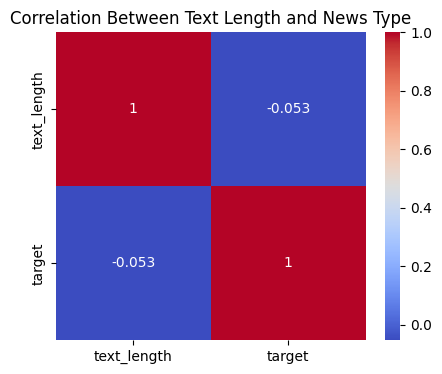

In [19]:
# Correlation Heatmap (Optional)
#If you engineer numeric features later (like text length), this helps spot relationships.
data['text_length'] = data['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(5,4))
sns.heatmap(data[['text_length','target']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Text Length and News Type")
plt.show()

#RANDOM FOREST

Training samples: 35918
Testing samples: 8980

 Model Accuracy: 0.9993

Classification Report:
               precision    recall  f1-score   support

    Fake (0)       1.00      1.00      1.00      4696
    True (1)       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



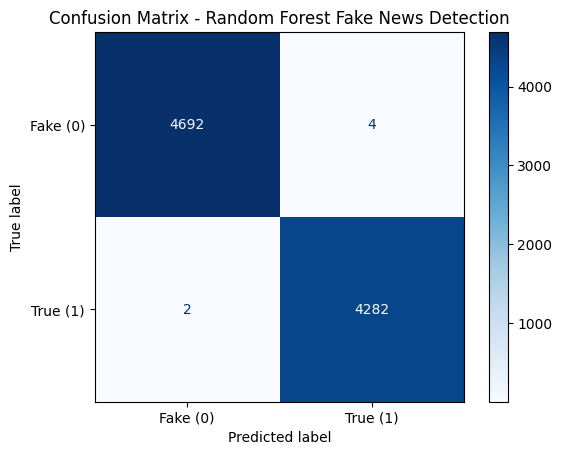

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)

# Data preparation
# Combine title, text, and subject into a single feature
data["combined_text"] = (
    data["title"].astype(str) + " " +
    data["text"].astype(str) + " " +
    data["subject"].astype(str)
)

X = data["combined_text"]
y = data["target"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

#Text vectorization
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=10000,  # increase for richer representation
    ngram_range=(1, 2)
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=40,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_vec, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_vec)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Fake (0)", "True (1)"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake (0)", "True (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest Fake News Detection")
plt.show()

In [15]:
# Check performance on training data
y_train_pred = rf_model.predict(X_train_vec)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.9993


#Logistic Regression

Accuracy: 0.9930
Confusion Matrix:
[[4659   37]
 [  26 4258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



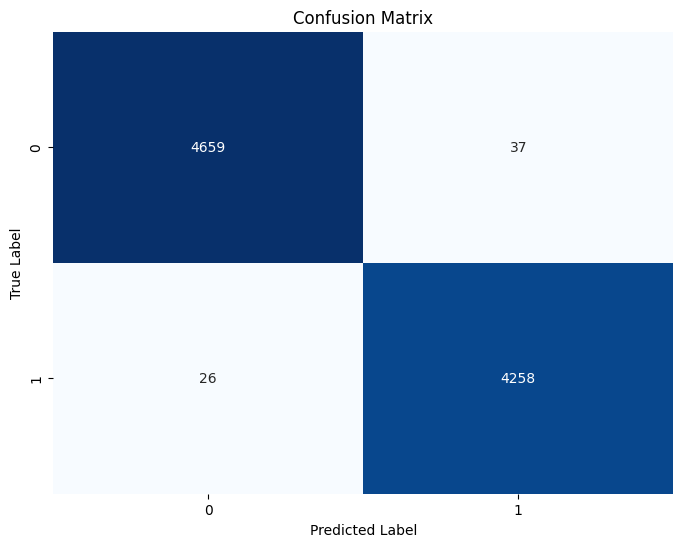

Top 20 Most Important Features:


,feature,coefficient,abs_coefficient
7457,reuters,19.367682,19.367682
7685,said,14.535967,14.535967
6582,politicsnews,13.865618,13.865618
9894,worldnews,9.984550,9.984550
6581,politics,-9.452656,9.452656
5870,news,-8.985689,8.985689
9700,washington reuters,7.758283,7.758283
9561,video,-7.012580,7.012580
5015,left news,-5.988165,5.988165
4752,just,-5.932245,5.932245


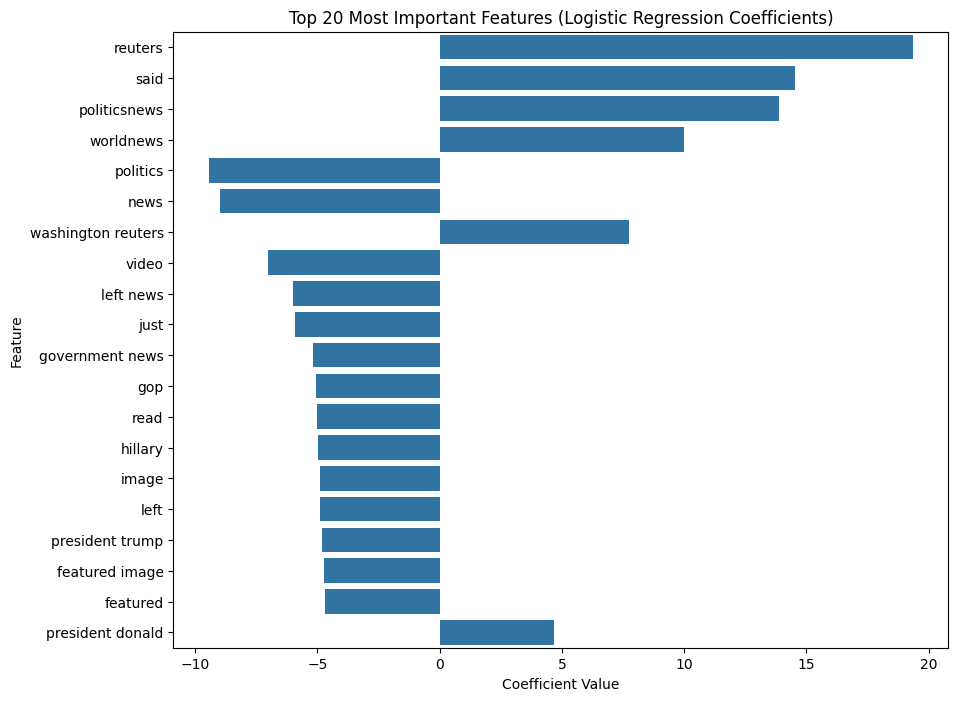

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize and train the Logistic Regression model with best parameters
model = LogisticRegression(C=1, penalty='l2')
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the coefficients from the trained model
coefficients = model.coef_[0]

# Create a DataFrame to store feature names and coefficients
feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Sort features by absolute coefficient value to see most important features
feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

# Display the top 20 most important features
print("Top 20 Most Important Features:")
display(feature_importance.head(20))

# Visualize the top 20 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='coefficient', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

#LSTM

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import json
import os

In [18]:
data_fake = pd.read_csv('Fake.csv')
data_fake['label'] = 0
data_true = pd.read_csv('True.csv')
data_true['label'] = 1

data = pd.concat([data_true,data_fake])
data.isnull().sum()
X = data['text']
y = data['label']

Tokenizing texts...
Train size: 35918, Test size: 8980
Sequences - Train: 35918, Test: 8980
Padded shapes - Train: (35918, 200), Test: (8980, 200)
Label shapes - Train: (35918,), Test: (8980,)
Building LSTM model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 419s 461ms/step - accuracy: 0.7709 - loss: 0.4714 - val_accuracy: 0.8711 - val_loss: 0.2870
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 430s 448ms/step - accuracy: 0.9075 - loss: 0.2479 - val_accuracy: 0.8126 - val_loss: 0.3465
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 446s 452ms/step - accuracy: 0.9440 - loss: 0.1656 - val_accuracy: 0.9873 - val_loss: 0.0474
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 457s 468ms/step - accuracy: 0.9965 - loss: 0.0186 - val_accuracy: 0.9987 - val_loss: 0.0065
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 440s 467ms/step - accuracy: 0.9991 - loss: 0.0049 - val_accuracy: 0.9962 - val_loss: 0.0189

Evaluating on test set...
281/281 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.9981 - loss: 0.0075
Test Accuracy: 0.9983
Test Loss: 0.0073

Calculating additional metrics...
281/281 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step

Classification Metrics:
Accuracy : 0.9983
Precision: 0.9977
Recall   : 0.9988
F1 Score : 0.9983


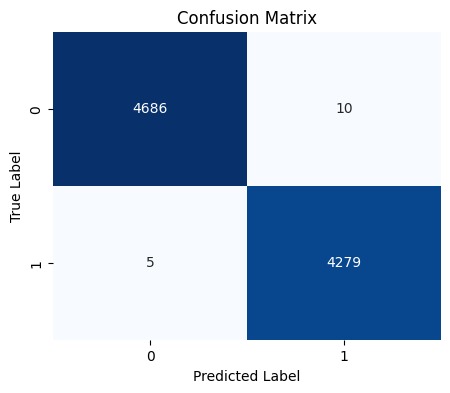

Model saved as 'lstm_model.keras'


In [19]:
# Parameters
MAX_WORDS = 100000
MAX_LEN = 200
EMBEDDING_DIM = 128
LSTM_UNITS = 64

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tokenize
print("Tokenizing texts...")
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

print(f"Sequences - Train: {len(X_train_seq)}, Test: {len(X_test_seq)}")

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

print(f"Padded shapes - Train: {X_train_pad.shape}, Test: {X_test_pad.shape}")

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f"Label shapes - Train: {y_train.shape}, Test: {y_test.shape}")

# Verify dimensions match
assert X_train_pad.shape[0] == y_train.shape[0], f"Train mismatch: {X_train_pad.shape[0]} vs {y_train.shape[0]}"
assert X_test_pad.shape[0] == y_test.shape[0], f"Test mismatch: {X_test_pad.shape[0]} vs {y_test.shape[0]}"


# Build LSTM model
print("Building LSTM model...")
model = Sequential([
    Embedding(MAX_WORDS, EMBEDDING_DIM),
    LSTM(LSTM_UNITS, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train model
print("Training model...")
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
print("\nEvaluating on test set...")
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# =========================
# ADDITIONAL METRICS BELOW
# =========================
print("\nCalculating additional metrics...")

# Predict probabilities
y_pred_prob = model.predict(X_test_pad)
# Convert to binary labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display metrics
print(f"\nClassification Metrics:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Save model
model.save('lstm_model.keras')
print("Model saved as 'lstm_model.keras'")

# Example prediction
def predict_news(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=MAX_LEN, padding='post', truncating='post')
    pred = model.predict(pad)[0][0]
    label = "REAL" if pred > 0.5 else "FAKE"
    confidence = pred if pred > 0.5 else 1 - pred
    return label, confidence

# # Test prediction
# sample_text = X_test[0]
# label, conf = predict_news(sample_text)
# print(f"\nSample prediction:")
# print(f"Text: {sample_text[:100]}...")
# print(f"Prediction: {label} (confidence: {conf:.2%})")

#**Naive Bayes **

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# --- 1. Load and Prepare Data ---

# Load the datasets
df_fake = pd.read_csv('/content/Fake.csv')
df_true = pd.read_csv('/content/True.csv')

# Assign a label to each dataset
df_fake['label'] = 0  # 0 for 'fake'
df_true['label'] = 1  # 1 for 'true'

# Combine the datasets
df_combined = pd.concat([df_fake, df_true]).reset_index(drop=True)

# Create a combined text feature for the model
df_combined['full_text'] = df_combined['title'] + ' ' + df_combined['text']

# --- 2. Separate Features and Target ---
X = df_combined['full_text']
y = df_combined['label']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Text Vectorization (Feature Engineering) ---
# Initialize the TF-IDF Vectorizer
# max_df=0.7 ignores words that appear in more than 70% of the documents
# stop_words='english' removes common English stop words (e.g., 'the', 'a', 'is')
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit the vectorizer on the training data and transform both sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# --- 4. Model Training ---
# Initialize and train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# --- 5. Prediction and Evaluation ---

# Make predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Generate the Classification Report
print("--- Naive Bayes Model Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Fake (0)', 'True (1)']))

# Generate the Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(
    conf_mat,
    index=['Actual Fake', 'Actual True'],
    columns=['Predicted Fake', 'Predicted True']
)

print("\n--- Naive Bayes Model Confusion Matrix (Rows: Actual, Columns: Predicted) ---")
print(conf_mat_df.to_markdown(numalign="left", stralign="left"))

--- Naive Bayes Model Classification Report ---
              precision    recall  f1-score   support

    Fake (0)       0.94      0.94      0.94      4696
    True (1)       0.94      0.93      0.93      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980


--- Naive Bayes Model Confusion Matrix (Rows: Actual, Columns: Predicted) ---
|             | Predicted Fake   | Predicted True   |
|:------------|:-----------------|:-----------------|
| Actual Fake | 4427             | 269              |
| Actual True | 295              | 3989             |


In [21]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Prediction ---

# Make predictions on the test set using the trained Naive Bayes model
# (nb_model, X_test_tfidf, and y_test are assumed to be loaded/trained previously)
y_pred = nb_model.predict(X_test_tfidf)

# --- 2. Evaluation (Testing) ---

# Generate the Classification Report
print("--- Naive Bayes Model Classification Report ---")
# 'target_names' map the 0 and 1 numerical labels back to their meaningful names
print(classification_report(y_test, y_pred, target_names=['Fake (0)', 'True (1)']))

# Generate the Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat_df = pd.DataFrame(
    conf_mat,
    index=['Actual Fake', 'Actual True'],
    columns=['Predicted Fake', 'Predicted True']
)

print("\n--- Naive Bayes Model Confusion Matrix (Rows: Actual, Columns: Predicted) ---")
print(conf_mat_df)

--- Naive Bayes Model Classification Report ---
              precision    recall  f1-score   support

    Fake (0)       0.94      0.94      0.94      4696
    True (1)       0.94      0.93      0.93      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980


--- Naive Bayes Model Confusion Matrix (Rows: Actual, Columns: Predicted) ---
             Predicted Fake  Predicted True
Actual Fake            4427             269
Actual True             295            3989


# Freddie

In [22]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, f1_score, precision_recall_fscore_support
from sentence_transformers import SentenceTransformer
import warnings, os
warnings.filterwarnings("ignore")

In [23]:
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

for df, lab in [(true_df, 1), (fake_df, 0)]:
    df["label"] = lab
    df["text_all"] = (
        df["title"].astype(str) + " [SEP] " +
        df["subject"].astype(str) + " [SEP] " +
        df["text"].astype(str)
    )

In [24]:
# --- Split: train on REAL only; evaluate on held-out REAL + all FAKE ---
train_real, holdout_real = train_test_split(true_df, test_size=0.30, random_state=42)
eval_df = pd.concat([holdout_real, fake_df], ignore_index=True)


In [25]:
# --- Embeddings (lightweight, GPU-friendly) ---
embedder = SentenceTransformer("all-MiniLM-L6-v2")   # 384-dim
X_train = embedder.encode(train_real["text_all"].tolist(), convert_to_numpy=True, show_progress_bar=True)
X_eval  = embedder.encode(eval_df["text_all"].tolist(),   convert_to_numpy=True, show_progress_bar=True)
y_eval  = eval_df["label"].to_numpy()


Batches:   0%|          | 0/469 [00:00<?, ?it/s]

Batches:   0%|          | 0/935 [00:00<?, ?it/s]

In [26]:
# --- Scale features (critical for distance-based methods) ---
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_eval_s  = scaler.transform(X_eval)


In [27]:
# ---------- Helpers ----------
def eval_binary(y_true, y_pred, scores=None, pos_label=1, name="model"):
    """Return dict with key metrics; pos_label=1 means REAL is positive for AUC."""
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", pos_label=pos_label, zero_division=0)
    acc = (y_true == y_pred).mean()
    auc = np.nan
    if scores is not None:
        try:
            auc = roc_auc_score(y_true, scores)  # scores: higher => more REAL-like
        except Exception:
            pass
    return {"model": name, "accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}


In [28]:
# ---------- Model A: One-Class SVM ----------
# Quick sweep over nu (expected outlier fraction) and gamma
ocsvm_results = []
best_oc = None; best_macro_f1 = -1
for nu in [0.05, 0.10, 0.20]:
    for gamma in ["scale", "auto"]:
        oc = OneClassSVM(kernel="rbf", nu=nu, gamma=gamma)
        oc.fit(X_train_s)
        oc_pred_raw = oc.predict(X_eval_s)             # +1 inlier (REAL-like), -1 outlier (FAKE-like)
        y_pred = (oc_pred_raw == 1).astype(int)
        # decision_function: larger => more inlier (REAL-like)
        scores = oc.decision_function(X_eval_s)
        # Macro F1 for model selection (treat REAL/FAKE symmetrically)
        f1_fake = f1_score(y_eval, y_pred, pos_label=0, zero_division=0)
        f1_real = f1_score(y_eval, y_pred, pos_label=1, zero_division=0)
        macro_f1 = (f1_fake + f1_real) / 2
        ocsvm_results.append((nu, gamma, macro_f1))
        if macro_f1 > best_macro_f1:
            best_macro_f1 = macro_f1
            best_oc = (oc, y_pred, scores, nu, gamma)

oc, y_pred_oc, scores_oc, nu_best, gamma_best = best_oc

In [29]:
# ---------- Model B: Isolation Forest ----------
iso_results = []
best_iso = None; best_macro_f1_iso = -1
for contamination in [0.05, 0.10, 0.20]:
    iso = IsolationForest(
        n_estimators=400, max_samples="auto", contamination=contamination,
        random_state=42, n_jobs=-1, bootstrap=False
    )
    iso.fit(X_train_s)                 # trained on REAL only
    iso_pred_raw = iso.predict(X_eval_s)        # +1 inlier, -1 outlier
    y_pred_iso = (iso_pred_raw == 1).astype(int)
    scores_iso = iso.decision_function(X_eval_s)  # larger => more inlier (REAL-like)
    f1_fake = f1_score(y_eval, y_pred_iso, pos_label=0, zero_division=0)
    f1_real = f1_score(y_eval, y_pred_iso, pos_label=1, zero_division=0)
    macro_f1 = (f1_fake + f1_real) / 2
    iso_results.append((contamination, macro_f1))
    if macro_f1 > best_macro_f1_iso:
        best_macro_f1_iso = macro_f1
        best_iso = (iso, y_pred_iso, scores_iso, contamination)

iso, y_pred_iso, scores_iso, cont_best = best_iso


In [30]:
# ---------- Reports ----------
print(f"[OCSVM] Selected nu={nu_best}, gamma={gamma_best}, macroF1={best_macro_f1:.3f}")
print(classification_report(y_eval, y_pred_oc, target_names=["FAKE","REAL"]))
oc_metrics = eval_binary(y_eval, y_pred_oc, scores=scores_oc, pos_label=1, name=f"OCSVM(nu={nu_best},gamma={gamma_best})")

print(f"\n[IsolationForest] Selected contamination={cont_best}, macroF1={best_macro_f1_iso:.3f}")
print(classification_report(y_eval, y_pred_iso, target_names=["FAKE","REAL"]))
iso_metrics = eval_binary(y_eval, y_pred_iso, scores=scores_iso, pos_label=1, name=f"IForest(cont={cont_best})")

summary = pd.DataFrame([oc_metrics, iso_metrics])
summary = summary[["model", "accuracy", "precision", "recall", "f1", "roc_auc"]]
summary

[OCSVM] Selected nu=0.2, gamma=scale, macroF1=0.532
              precision    recall  f1-score   support

        FAKE       0.90      0.48      0.63     23481
        REAL       0.30      0.80      0.43      6426

    accuracy                           0.55     29907
   macro avg       0.60      0.64      0.53     29907
weighted avg       0.77      0.55      0.59     29907


[IsolationForest] Selected contamination=0.2, macroF1=0.393
              precision    recall  f1-score   support

        FAKE       0.84      0.28      0.42     23481
        REAL       0.24      0.81      0.36      6426

    accuracy                           0.39     29907
   macro avg       0.54      0.54      0.39     29907
weighted avg       0.71      0.39      0.41     29907



,model,accuracy,precision,recall,f1,roc_auc
0,"OCSVM(nu=0.2,gamma=scale)",0.551476,0.298105,0.802832,0.434772,0.710149
1,IForest(cont=0.2),0.394757,0.235273,0.807345,0.364364,0.595241



 Model Performance Comparison (All Models):



,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.9993,1.0000,1.0000,1.0000
1,Logistic Regression,0.9900,0.9900,0.9900,0.9900
2,Naive Bayes,0.9400,0.9400,0.9400,0.9400
3,LSTM,0.9983,0.9977,0.9988,0.9983
4,OCSVM,0.5515,0.2980,0.8030,0.4350
5,Isolation Forest,0.3950,0.2352,0.8070,0.3600


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.9993,1.0000,1.0000,1.0000
3,LSTM,0.9983,0.9977,0.9988,0.9983
1,Logistic Regression,0.9900,0.9900,0.9900,0.9900
2,Naive Bayes,0.9400,0.9400,0.9400,0.9400
4,OCSVM,0.5515,0.2980,0.8030,0.4350
5,Isolation Forest,0.3950,0.2352,0.8070,0.3600


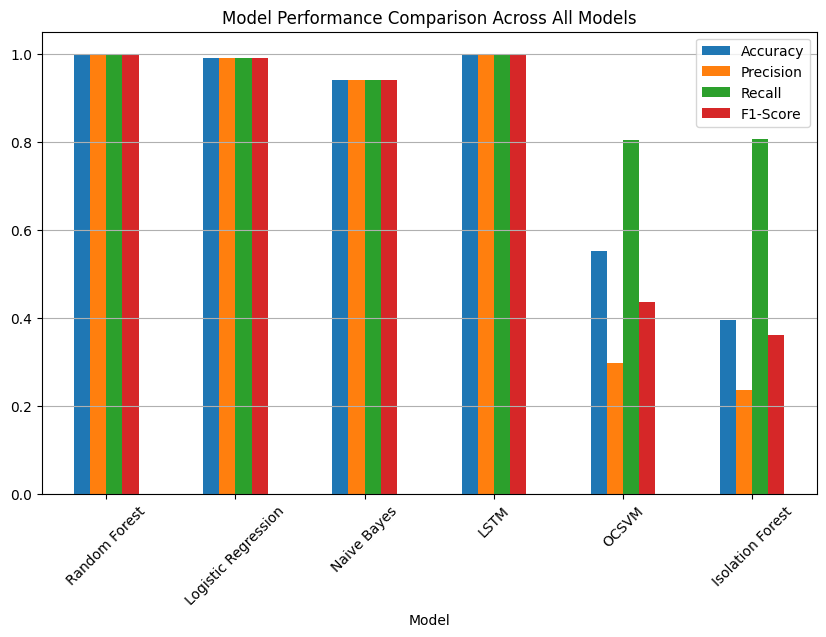

In [41]:

import pandas as pd
import matplotlib.pyplot as plt

# Example metrics — replace these with your actual results
rf_metrics = {"Model": "Random Forest", "Accuracy": 0.9993, "Precision": 1.00, "Recall": 1.00, "F1-Score": 1.00}
lr_metrics = {"Model": "Logistic Regression", "Accuracy": 0.99, "Precision": 0.99, "Recall": 0.99, "F1-Score": 0.99}
nb_metrics = {"Model": "Naive Bayes", "Accuracy": 0.94, "Precision": 0.94, "Recall": 0.94, "F1-Score": 0.94}
lstm_metrics = {"Model": "LSTM", "Accuracy": 0.9983, "Precision": 0.9977, "Recall": 0.9988, "F1-Score": 0.9983}
oc_metrics = {"Model": "OCSVM", "Accuracy": 0.5515, "Precision": 0.298, "Recall": 0.803, "F1-Score": 0.435}
iso_metrics = {"Model": "Isolation Forest", "Accuracy": 0.395, "Precision": 0.2352, "Recall": 0.807, "F1-Score": 0.36}

# Combine all results
all_results_df = pd.DataFrame([
    rf_metrics, lr_metrics, nb_metrics, lstm_metrics, oc_metrics, iso_metrics
])

# Ensure all numeric columns are numeric (to avoid format error)
for col in ["Accuracy", "Precision", "Recall", "F1-Score"]:
    all_results_df[col] = pd.to_numeric(all_results_df[col], errors="coerce")

# Display table safely
print("\n Model Performance Comparison (All Models):\n")
display(all_results_df.style.background_gradient(cmap="Blues").format(precision=4))

# Sort by F1-score
sorted_results = all_results_df.sort_values(by="F1-Score", ascending=False)
display(sorted_results)

# Visualization
all_results_df.plot(
    x="Model",
    y=["Accuracy", "Precision", "Recall", "F1-Score"],
    kind="bar",
    figsize=(10, 6),
    title="Model Performance Comparison Across All Models"
)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()







#EXPLAINABILITY ON THE BEST MODEL

In [42]:

#  Install SHAP
%pip install shap




Computing SHAP values... (this may take a minute)


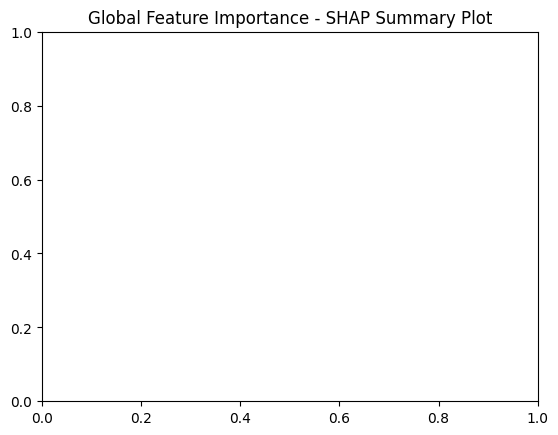

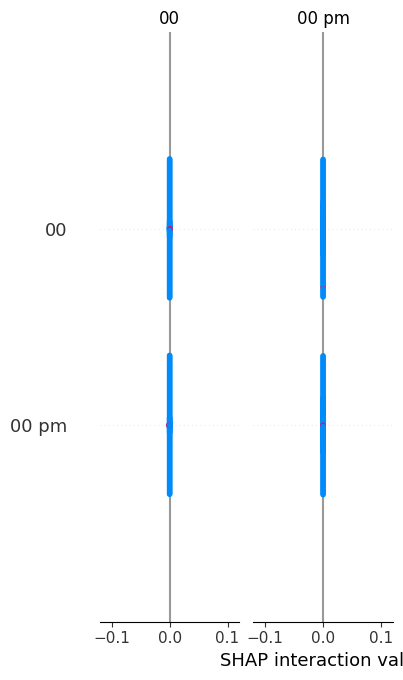

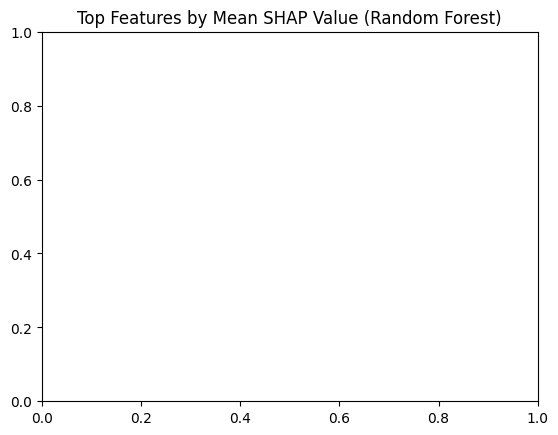

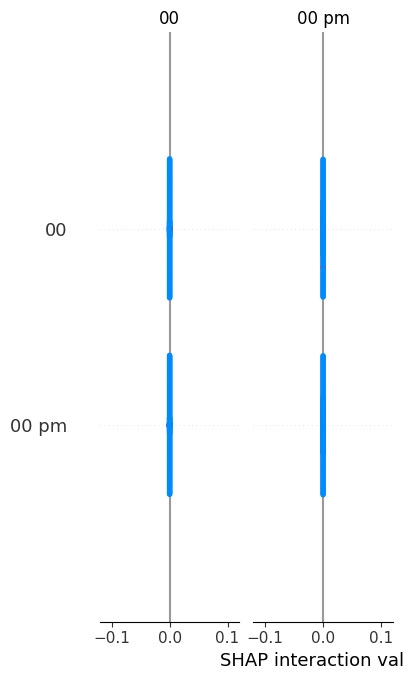

In [47]:
#  Fix SHAP Shape Mismatch Error

import shap
import numpy as np
import matplotlib.pyplot as plt


#  Create TreeExplainer for Random Forest
explainer = shap.TreeExplainer(rf_model)

#  Convert sparse matrix to dense and take a sample
sample_size = min(200, X_test_vec.shape[0])
X_test_sample = X_test_vec[:sample_size].toarray()

#  Compute SHAP values safely
print("Computing SHAP values... (this may take a minute)")
shap_values = explainer.shap_values(X_test_sample)

#  Get feature names from your vectorizer
feature_names = vectorizer.get_feature_names_out()

#  Check and fix SHAP/data mismatch automatically
if isinstance(shap_values, list):  # binary classification returns list of arrays
    shap_matrix = shap_values[1]
else:
    shap_matrix = shap_values

# Ensure same number of columns
if shap_matrix.shape[1] != X_test_sample.shape[1]:
    print(f" Adjusting: shap_values has {shap_matrix.shape[1]}, X_test has {X_test_sample.shape[1]}")
    min_features = min(shap_matrix.shape[1], X_test_sample.shape[1])
    shap_matrix = shap_matrix[:, :min_features]
    X_test_sample = X_test_sample[:, :min_features]
    feature_names = feature_names[:min_features]

# Summary Plot (Global Feature Importance)
plt.title("Global Feature Importance - SHAP Summary Plot")
shap.summary_plot(shap_matrix, X_test_sample, feature_names=feature_names, show=False)
plt.show()

# Bar Plot (Mean SHAP Values)
plt.title("Top Features by Mean SHAP Value (Random Forest)")
shap.summary_plot(shap_matrix, X_test_sample, feature_names=feature_names, plot_type="bar", show=False)
plt.show()





